# TP 3: Sistemas dinámicos
---

### Ejercicio 1: Red recurrente lineal y determinista

Dada una red neuronal lineal que cuya dinámica satisface la siguiente ecuación:

$$\dot{r} = -r + Wr + h$$

Donde r es el vector de respuestas neuronales (tasas de disparo), W es la matriz de pesos sinápticos y h(t) es una entrada a la red (ruído, estímulos externos, entradas de otras redes, etc.)

Considere una red con dos neuronas, una excitatoria y una inhibitoria, que están conectadas recíprocamente con peso de la misma magnitud **a**.


*a. Dibuje la red de dos neuronas (con sus conexiones y respectivos pesos).*

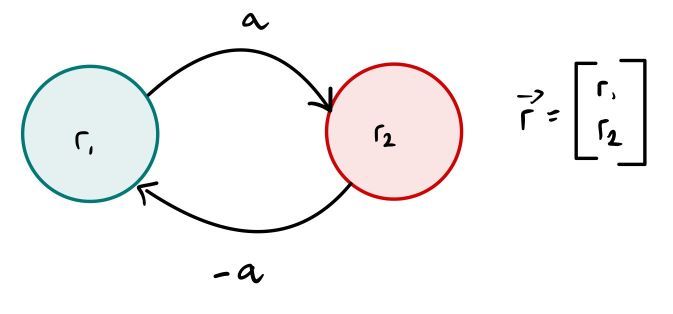

*b. ¿Cómo es la matriz de pesos W? ¿Cuáles son sus autovalores?*

Asumiendo que las neuronas no hacen sinapsis consigo mismas, surge naturalmente la siguiente matriz:
$$
W = \begin{bmatrix}
    0 & -a \\
    a & 0 \\
    \end{bmatrix}
$$

diagonalizando, obtenemos

$$
W = \begin{bmatrix}
    1 & 1 \\
    -i & i \\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    ai & 0 \\
    0 & -ai \\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    \frac{1}{2} & \frac{1}{2} i \\
    \frac{1}{2} & - \frac{1}{2} i \\
    \end{bmatrix}
$$

*c. Resuelva para conseguir la dinámica del sistema de manera analítica, partiendo de condición inicial con las dos neuronas activas (r=(1,1)T) y sin ninguna entrada (es decir, h=0). Para esto, calcule los autovalores y autovectores y haga el desarrollo diagonalizando la matriz como vimos en clase.*

Para resolver la dinámica del sistema, tenemos que considerar tanto la matriz de pesos sinápticos como la realimentación negativa del término $-r$. Para ello, vamos a trabajar con la siguiente matriz:

$$  
B = W - I = 
\begin{bmatrix}
    -1 & -a \\
    a & -1 \\
\end{bmatrix}
$$

De esta manera, el sistema queda definido como

$$\dot{r} = Br + h$$

**TEOREMA**: Dada una matriz $M$, y un polinomio genérico de dimensión finita $P(\cdot)$, si $M$ tiene N autovalores $\lambda _{i}$ con autovectores asociados $\overrightarrow{v_{i}}$ (para $i=0,\dots,N$), entonces $P(M)$ tendrá autovalores en $P\left(\lambda _{i}\right)$ con autovectores asociados $\overrightarrow{v_{i}}$


Aplicando este teorema, conociendo los autovalores y autovectores de W, obtenemos que $B = W - I = Q \Lambda Q^{-1}$, donde

$$  
Q = 
\begin{bmatrix}
    1 & 1 \\
    -i & i \\
\end{bmatrix} , \  
\Lambda = 
\begin{bmatrix}
    -1 + ai & 0 \\
    0 & -1 - ai \\
\end{bmatrix}
$$

Luego, la solución analítica de este sistema (fijando $h(t) = 0, \ \forall t>0$) está dada por

$$r(t) = Q \cdot e^{\Lambda t} \cdot Q^{-1} \cdot r(0)$$

Para $r(0) = [1 \ \ 1]^T$, obtenemos:

$$ 
\begin{bmatrix}
    r_{1}(t) \\
    r_{2}(t) \\
\end{bmatrix}
=
\begin{bmatrix}
    1 & 1 \\
    -i & i \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    e^{(-1 + ai)t} & 0 \\
    0 & e^{(-1 - ai)t} \\
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} i \\
\frac{1}{2} & - \frac{1}{2} i \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    1 \\
    1 \\
\end{bmatrix}
$$

$$ \implies
\begin{bmatrix}
    r_{1}(t) \\
    r_{2}(t) \\
\end{bmatrix}
=
e^{-t}
\cdot
\begin{bmatrix}
    e^{ait} &  e^{-ait} \\
    -ie^{-ait} & ie^{-ait} \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    \frac{1}{2} + \frac{1}{2} i\\
    \frac{1}{2} - \frac{1}{2} i\\
\end{bmatrix}

$$

$$ \mathbf{
\implies
\begin{bmatrix}
    r_{1}(t) \\
    r_{2}(t) \\
\end{bmatrix}
=
e^{-t}
\begin{bmatrix}
    cos(at) - sen(at)\\
    sen(at) + cos(at)\\
\end{bmatrix}
}
$$

*d. Grafique la trayectoria del sistema en 2D (con r1 en el eje horizontal y r2 en el eje vertical). (5 puntos)*

*e. Grafique la trayectoria de cada neurona vs tiempo. (5 puntos)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
t = np.linspace(0, 10, 1000)

def dynamic_plot(a: float = 1) -> None:
    """
    a: system frequency
    Plots the system evolution using an interative widget slider
    """
    r_1 = np.exp(-t)*(np.cos(a*t) - np.sin(a*t))
    r_2 = np.exp(-t)*(np.sin(a*t) + np.cos(a*t))

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Evolución del sistema', fontsize=15)

    axs[0].plot(t, r_1, color='red')
    axs[0].set_title('$r_{1}(t)$')
    axs[1].plot(t, r_2, color='red')
    axs[1].set_title('$r_{2}(t)$')
    axs[2].plot(r_1, r_2, color='red')
    axs[2].set_title('$r_{2} vs. r_{1}$')

    plt.show()

widgets.interact(dynamic_plot, a = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1))

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=-10.0), Output()), _dom_classes=('…

<function __main__.dynamic_plot(a: float = 1) -> None>

---
### Ejercicio 2

*a. Convierta la ecuación diferencial de arriba a su versión en tiempo discreto de la forma: $r_{t+dt} = Br_{t} + h_{t}$*

Nuevamente, tenemos que $B = W - I$, donde $I$ es la matriz identidad 2x2

*b. Simule el sistema, muestreando ruido de $h_{t}$ de una distribución normal bivariada con covarianza proporcional a la matriz identidad (es decir, ruido independiente para cada neurona con desvío estándar σ).*

NOTA: Aprovechando la cursada de métodos numéricos, vamos a simular utilizando Runge-Kutta 4 en vez de Euler

In [7]:
# Definimos la función para simular con Runge-Kutta 4
from typing import Callable

def ruku4(T: np.ndarray, F: Callable, X_0: np.ndarray, *args, **kwargs) -> np.ndarray:
    """
    :param np.ndarray T: time array of len N, defined as the range a:h:b
    :param np.ndarray F: array of functions of len M
    :param np.ndarray X_0: array of initial conditions at T[0]

    Uses the Runge-Kutta 4 method to solve the following system of differential equations:
    dX/dt = F(T, X(T))
    where X and F are vectors of functions of time

    :return np.ndarray: X, an array of dimensions M x N with the values of each X[i] at T[j]
    """
    h = T[1] - T[0]
    N = len(T)
    M = len(F(0, X_0, *args, **kwargs))
    X = np.zeros((N, M))
    X[0, :] = X_0

    for j in range(N - 1):
        X_j = X[j, :]
        k1 = F(T[j], X_j, *args, **kwargs)
        k2 = F(T[j] + h / 2, X_j + (h / 2) * k1, *args, **kwargs)
        k3 = F(T[j] + h / 2, X_j + (h / 2) * k2, *args, **kwargs)
        k4 = F(T[j] + h, X_j + h * k3)
        X[j + 1, :] = X_j + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return X

Ahora, haciendo uso de esta función, vamos a simular numéricamente la evolución del sistema agregando un ruido normal de igual varianza para cada instante.

In [8]:
# Define B matrix
a = 10
B = np.array([[-1, -a], [a, -1]])

# Define derivative function
def X_deriv(t: float, X: np.ndarray, sigma: float=0.1) -> np.ndarray:
    """
    Aproximates the derivative of X
    NOTE: the t variable will NOT be used, but we need it to apply the ruku4 function
    """
    return B @ X + np.random.normal(scale=sigma, size=X.shape)

# Set initial values and simulate
r0 = np.array([1, 1])
t_arr = np.linspace(0, 10, 1000) # dt = 10/1000 = 0.01
r = ruku4(t_arr, X_deriv, r0, sigma=0.1) # desviación estándar de 0.1
r_1 = r[:, 0]
r_2 = r[:, 1]

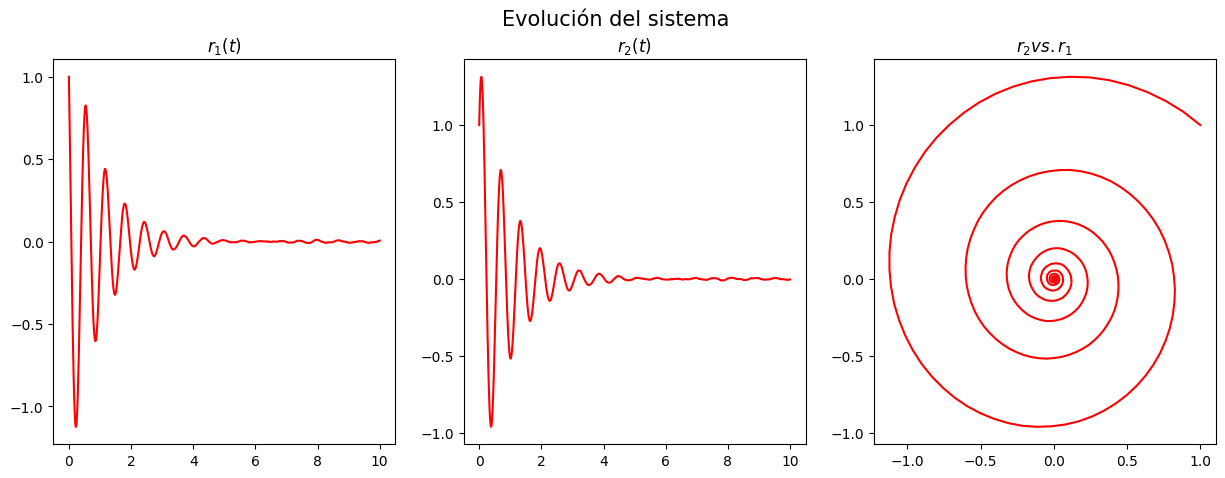

In [9]:
# Plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Evolución del sistema', fontsize=15)

axs[0].plot(t_arr, r_1, color='red')
axs[0].set_title('$r_{1}(t)$')
axs[1].plot(t_arr, r_2, color='red')
axs[1].set_title('$r_{2}(t)$')
axs[2].plot(r_1, r_2, color='red')
axs[2].set_title('$r_{2} vs. r_{1}$')

plt.show()

Para ver cómo influye la varianza en la evolución del sistema, vamos a crear un widget interactivo que simule el sistema para distintos valores de sigma

In [10]:
def sigma_plot(sigma: float) -> None:
    """
    sigma: Gaussian noise std
    Plots the system evolution using an interative widget slider
    """
    # Set initial values and simulate
    r0 = np.array([1, 1])
    t_arr = np.linspace(0, 10, 1000) # dt = 10/1000 = 0.01
    r = ruku4(t_arr, X_deriv, r0, sigma=sigma) # desviación estándar de 0.5
    r_1 = r[:, 0]
    r_2 = r[:, 1]

    # Plots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Evolución del sistema', fontsize=15)

    axs[0].plot(t_arr, r_1, color='red')
    axs[0].set_title('$r_{1}(t)$')
    axs[1].plot(t_arr, r_2, color='red')
    axs[1].set_title('$r_{2}(t)$')
    axs[2].plot(r_1, r_2, color='red')
    axs[2].set_title('$r_{2} vs. r_{1}$')

    plt.show()

widgets.interact(sigma_plot, sigma = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01))

interactive(children=(FloatSlider(value=0.1, description='sigma', max=1.0, step=0.01), Output()), _dom_classes…

<function __main__.sigma_plot(sigma: float) -> None>

*c. Corra esta simulación K=50 veces, ploteando los puntos como puntos (es decir, como gráfico de dispersión en vez de traza) y coloreando todos los puntos correspondientes a cierto tiempo del mismo color (es decir, 50 puntos de un color para t=0, 50 puntos de otro color para t=1, etc.). ¿Qué observa en la varianza de $r_t$ en el tiempo?*

In [11]:
# Corremos las 50 simulaciones
r0 = np.array([1, 1])
t_arr = np.linspace(0, 10, 1000) # dt = 10/1000 = 0.01
N_SIM = 50
r_1_list = []
r_2_list = []

for i in range(N_SIM):
    r = ruku4(t_arr, X_deriv, r0)
    r_1_list.append(r[:, 0])
    r_2_list.append(r[:, 1])

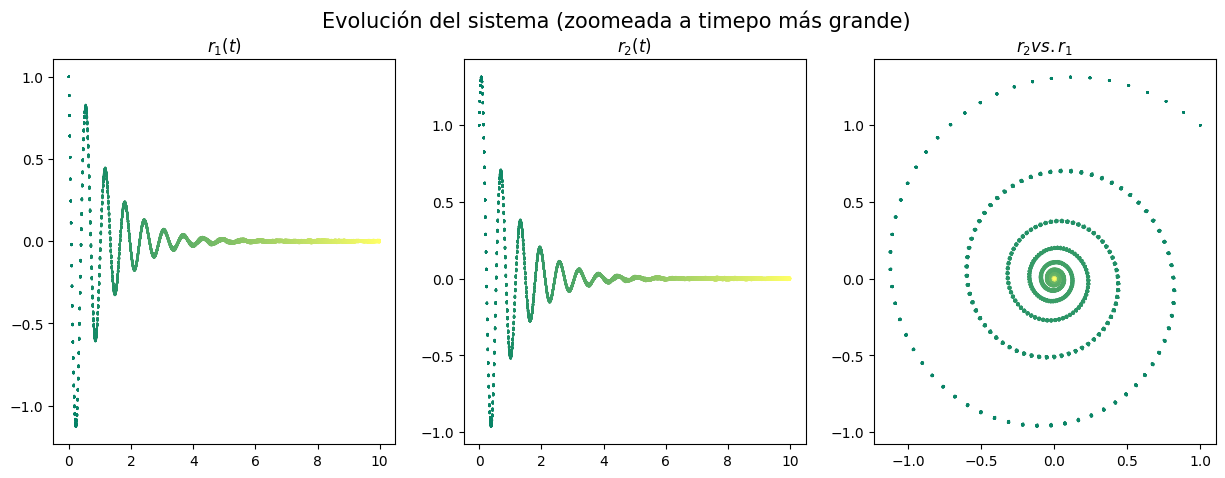

In [12]:
# Plots
t_list = [t_arr for i in range(N_SIM)]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Evolución del sistema (zoomeada a timepo más grande)', fontsize=15)

axs[0].scatter(t_list, r_1_list, c=t_list, cmap='summer', s=0.3)
axs[0].set_title('$r_{1}(t)$')
axs[1].scatter(t_list, r_2_list, c=t_list, cmap='summer', s=0.3)
axs[1].set_title('$r_{2}(t)$')
axs[2].scatter(r_1_list, r_2_list, c=t_list, cmap='summer', s=0.3)
axs[2].set_title('$r_{2} vs. r_{1}$')

plt.show()

En principio, el efecto del ruido en la dispersión no parece ser muy notorio a gran escala, pero pareciera ser que a mayores valores de tiempo (lo que implica menores valores del módulo de r), los datos presentan más variación. Hagamos un zoom en esta sección del gráfico para analizarlo mejor.

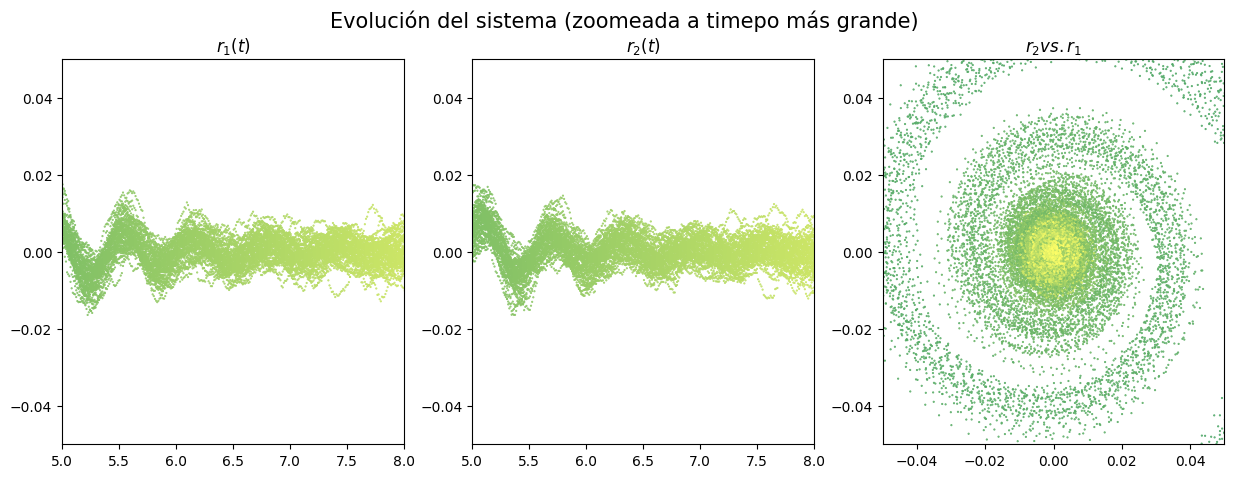

In [13]:
# Plots with zoom
t_list = [t_arr for i in range(N_SIM)]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Evolución del sistema (zoomeada a timepo más grande)', fontsize=15)

axs[0].scatter(t_list, r_1_list, c=t_list, cmap='summer', s=0.3)
axs[0].set_title('$r_{1}(t)$')
axs[1].scatter(t_list, r_2_list, c=t_list, cmap='summer', s=0.3)
axs[1].set_title('$r_{2}(t)$')
axs[2].scatter(r_1_list, r_2_list, c=t_list, cmap='summer', s=0.3)
axs[2].set_title('$r_{2} vs. r_{1}$')

# Zoom in to higher time
axs[0].set_xlim(5, 8)
axs[1].set_xlim(5, 8)
axs[0].set_ylim(-0.05, 0.05)
axs[1].set_ylim(-0.05, 0.05)

axs[2].set_xlim(-0.05, 0.05)
axs[2].set_ylim(-0.05, 0.05)

plt.show()

Aparentemente, la dispersión se vuelve más grande a mayores valores de tiempo, tal vez porque el ruido se vuelve relativamente más prominente para valores más pequeños de $r_1$ y $r_2$

---

### Ejercicio 3

Considere una red con dinámica “Winner-Take-All” definida por las ecuaciones diferenciales

$$\tau E_{1}' = -E_{1} + S(K_{1} - 5 E_{2} - 5 E_{3})$$
$$\tau E_{1}' = -E_{1} + S(K_{2} - 5 E_{1} - 5 E_{3})$$
$$\tau E_{1}' = -E_{1} + S(K_{3} - 5 E_{2} - 5 E_{3})$$

Con $\tau = 10$, $K_1 = K_2 = K_3 = 80$, y S siendo

$$
S(x)=\left\{\begin{array}{l}
\frac{100 x^2}{40^2+x^2} \text { for } x \geq 0 \\
0 \text { for } x<0
\end{array}\right.
$$

*a) Calcule los puntos fijos. Son cuatro puntos: tres simétricos ($E_i = a$ y $E_{j \neq i} = 0$, es decir, 2 de las 3 neuronas valen 0) y otro donde las tres neuronas valen lo mismo ($E_1= E_2= E_3$)*

Para los puntos fijos en donde $E_i = a$ y $E_{j \neq i} = 0$, despejando en el sistema de ecuaciones, se llega a que $a = S(K)$. 

Luego, para el punto fijo simétrico donde $E_i = x$ $\forall i=1,2,3$, se puede demostrar que $x$ debe satisface la siguiente ecuación:
$$x^3 - 116x^2 +1616x - 80 = 0$$
Resolviendo numéricamente, llegamos a que el valor de $x$ que satisface esta ecuación y genera un punto fijo es aproximadamente $x_0 \approx 99.8186735$. 

En conclusión, los 4 puntos fijos del sistema son:

$$
\begin{bmatrix}
    S(k) \\
    0 \\
    0 \\
\end{bmatrix}, 
\begin{bmatrix}
    0 \\
    S(k) \\
    0 \\
\end{bmatrix},
\begin{bmatrix}
    0 \\
    0 \\
    S(k) \\
\end{bmatrix},
\begin{bmatrix}
    x_0 \\
    x_0 \\
    x_0 \\
\end{bmatrix}
$$

*b. Simule trayectorias del sistema empezando de distintos puntos aleatorios*